In [30]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns

from global_config import config
import pandas as pd
import numpy as np
import rpy2
import os

from datetime import date, timedelta


data_dir_mnps   = config.get_property('geo_dir')
data_dir        = config.get_property('data_dir')
fb_ppl_data     = config.get_property('covid_fb')
results_dir     = config.get_property('results_dir')
data_cases_path = os.path.join(fb_ppl_data, 'agglomerated', 'geometry')


In [31]:

# Defines lockdowns
no_lock_lab = "No Lockdown Imposed"
lock_lab    = "Lockdown Imposed"


lockdowns = []
lockdowns.append({"code": "A",
                  "start_date" : pd.to_datetime("2020-07-13"),
                  "end_date"   : pd.to_datetime("2020-07-23"),
                  "places":["chapinero",
                            "los_martires",
                            "san_cristobal",
                            "tunjuelito",
                            "rafel_uribe_uribe",
                            "ciudad_bolivar",
                            "santa_fe",
                            "usme"]})

lockdowns.append({"code": "B",
                  "start_date" : pd.to_datetime("2020-07-23"),
                  "end_date"   : pd.to_datetime("2020-08-06"),
                  "places":["bosa",
                            "antonio_narino",
                            "kennedy",
                            "puente_aranda",
                            "fontibon"]})

lockdowns.append({"code": "C",
                  "start_date" : pd.to_datetime("2020-07-31"),
                  "end_date"   : pd.to_datetime("2020-08-14"),
                  "places":["suba",
                            "engativa",
                            "barrios_unidos"]})

lockdowns.append({
                  "code": "D",
                  "start_date" : pd.to_datetime("2020-08-16"),
                  "end_date"   : pd.to_datetime("2020-08-27"),
                  "places":["usaquen",
                            "chapinero",
                            "santa_fe",
                            "candelaria",
                            "teusaquillo",
                           "puente_aranda",
                           "antonio_narino"]})


In [32]:
os.listdir(os.path.join(results_dir, "movement_analysis"))

#landmarks_df =  pd.read_csv(os.path.join(results_dir, "movement_analysis", "landmarks.csv"))

landmarks_A_df = pd.read_csv(os.path.join(results_dir, "movement_analysis", "final_data", "landmarks_lockdown_A.csv")).rename(columns={"type":"Type"})
landmarks_A_df["group"] = "A"

landmarks_B_df = pd.read_csv(os.path.join(results_dir, "movement_analysis", "final_data", "landmarks_lockdown_B.csv")).rename(columns={"type":"Type"})
landmarks_B_df["group"] = "B"

landmarks_C_df = pd.read_csv(os.path.join(results_dir, "movement_analysis", "final_data", "landmarks_lockdown_C.csv")).rename(columns={"type":"Type"})
landmarks_C_df["group"] = "C"

landmarks_D_df = pd.read_csv(os.path.join(results_dir, "movement_analysis", "final_data", "landmarks_lockdown_D.csv")).rename(columns={"type":"Type"})
landmarks_D_df["group"] = "D"

landmarks_df = pd.concat([landmarks_A_df, landmarks_B_df, landmarks_C_df, landmarks_D_df])


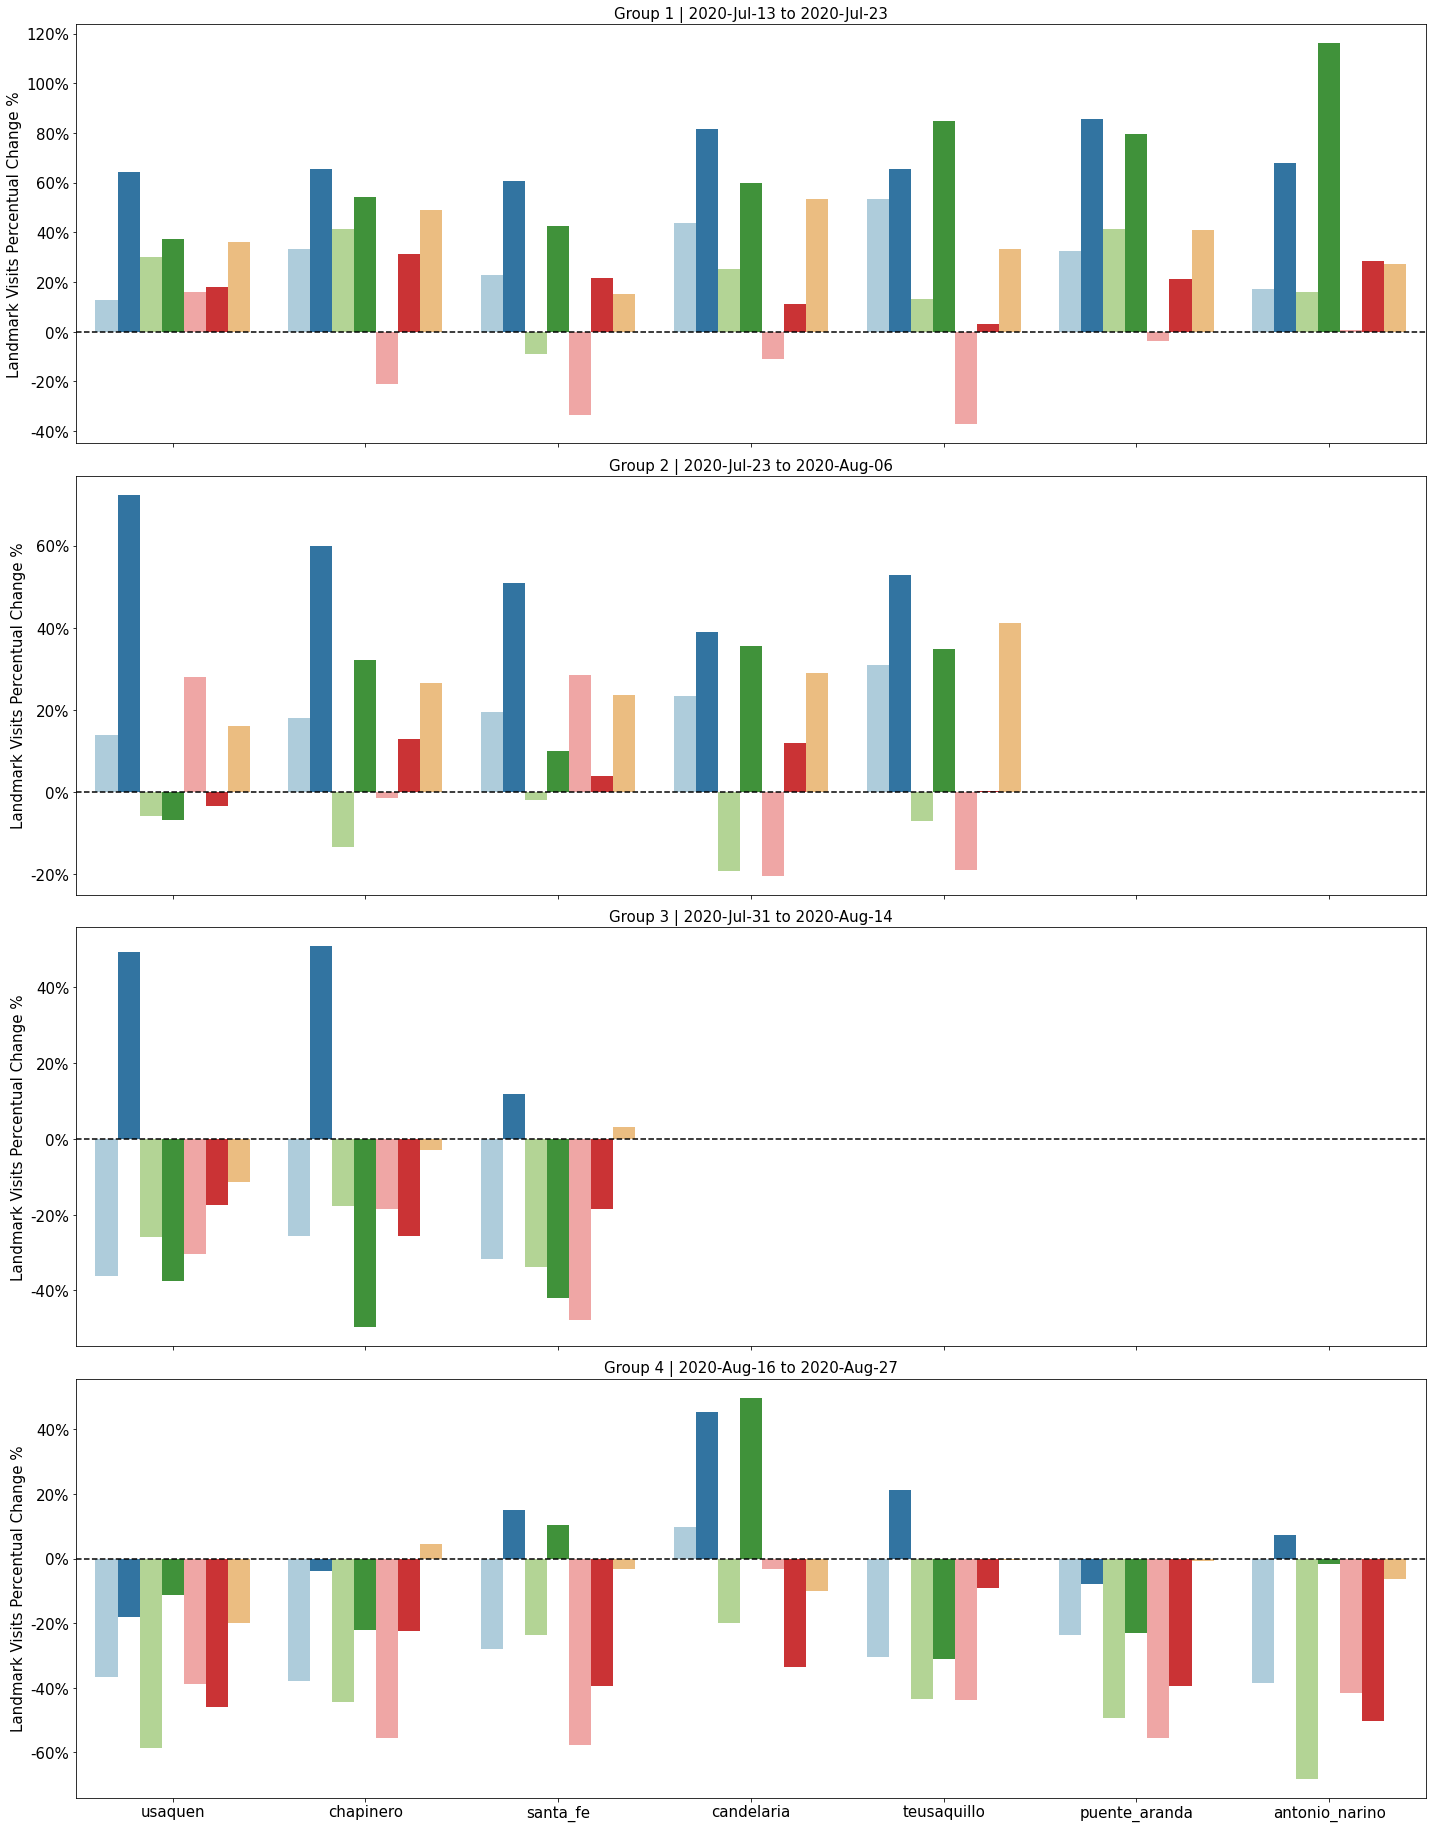

In [40]:
fig, ax = plt.subplots(4, 1, figsize=(25, 25.5), sharex=True)

sns.barplot(ax=ax[0], data=landmarks_A_df, x="place", y="change", hue="Type", palette="Paired")
sns.barplot(ax=ax[1], data=landmarks_B_df, x="place", y="change", hue="Type", palette="Paired")
sns.barplot(ax=ax[2], data=landmarks_C_df, x="place", y="change", hue="Type", palette="Paired")
sns.barplot(ax=ax[3], data=landmarks_D_df, x="place", y="change", hue="Type", palette="Paired")

codes_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
for idx, axi in enumerate(ax.flatten()):
    lock = lockdowns[idx]

    axi.set_title(f"{codes_names[idx]} | {lock['start_date'].strftime('%Y-%b-%d')} to {lock['end_date'].strftime('%Y-%b-%d')}", fontsize=15)
    axi.legend(loc='upper right', fontsize=15, title='Intervention', title_fontsize=15)
    axi.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0%}"))
    #axi.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0%}"))
    axi.set_xlabel(None)
    axi.set_ylabel(r'Landmark Visits Percentual Change %', fontsize=15)
    axi.axhline(y=0, color='black', linestyle='--')
    axi.tick_params(axis='both', labelsize=15)
    axi.get_legend().remove()

plt.tight_layout()

fig.savefig(os.path.join(results_dir, 'figures_paper', 'Fig4B.png'), dpi=300,  bbox_inches='tight', transparent=True)
